###Open file and initiate variables

In [5]:
import glob
import os
import csv
import zipfile
import StringIO

s_root = "C:/Users/Vera"
s_root = "/Users/ucaiado"
s_name = s_root + "/Dropbox/NEUTRINO/ALGO/DATA/pisa2012.csv.zip"
s_dict = s_root + "/Dropbox/NEUTRINO/ALGO/DATA/pisadict2012.csv"

###Create a function to read the file and read the file labels

In [6]:
import pandas as pd

In [7]:
df_labels = pd.read_csv(s_dict)
df_labels.columns=["VAR","DESCRIPTION"]

In [8]:
df_labels.head(5)

,VAR,DESCRIPTION
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
2,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
3,OECD,OECD country
4,NC,National Centre 6-digit Code


In [9]:
import csv
import zipfile

def _getFields(l_fields, row):
    '''
    Return a dictionary with the data into the row, filtering 
    the fields passed 
    '''
    return {k: row.get(k, None) for k in l_fields}

def getData(s_file, l_fields):
    '''
    Return a list of dictionaries with the data desired
    '''
    with open(s_file, 'rb') as f1:
        zfile = zipfile.ZipFile(f1)
        l_rtn = []
        with zfile.open(zfile.filelist[0].filename) as f:
            reader = csv.DictReader(f)
            for idx, row in enumerate(reader):
                #count lines processed
                if idx%50000==0: print "estou na linha {}".format(idx)
                #get data desired
                l_rtn.append(_getFields(l_fields, row))
        print "estou na linha {}".format(idx)
        
    return l_rtn    

In [9]:
l_test = list(df_labels.head(5).VAR)
%time d_data = getData(s_name, l_test)

estou na linha 0
estou na linha 50000
estou na linha 100000
estou na linha 150000
estou na linha 200000
estou na linha 250000
estou na linha 300000
estou na linha 350000
estou na linha 400000
estou na linha 450000
estou na linha 485489
CPU times: user 2min 25s, sys: 1.09 s, total: 2min 26s
Wall time: 2min 27s


###let's see the countries names

In [40]:
df_country =  pd.DataFrame(d_data)

In [44]:
df_country.head()

,CNT,NC,OECD,STRATUM,SUBNATIO
0,Albania,Albania,Non-OECD,ALB0006,0080000
1,Albania,Albania,Non-OECD,ALB0006,0080000
2,Albania,Albania,Non-OECD,ALB0006,0080000
3,Albania,Albania,Non-OECD,ALB0006,0080000
4,Albania,Albania,Non-OECD,ALB0006,0080000


In [76]:
b=[x.strip() for x in df_country.CNT.unique()]
a=[x.strip() for x in df_country.NC.unique()]

In [79]:
[x for  x in a if x not in b]

['United Kingdom (excl.Scotland)',
 'United Kingdom (Scotland)',
 'Republic of Korea',
 'China (Shanghai)',
 'Perm (Russian Federation)',
 'Viet Nam']

In [78]:
[x for  x in b if x not in a]

['United Kingdom',
 'Korea',
 'China-Shanghai',
 'Perm(Russian Federation)',
 'Florida (USA)',
 'Connecticut (USA)',
 'Massachusetts (USA)',
 'Vietnam']

###I like more the CNT names. I will make just some changes

In [6]:
l_test = ["CNT","SUBJECT"]
%time d_data = getData(s_name, l_test)

estou na linha 0
estou na linha 50000
estou na linha 100000
estou na linha 150000
estou na linha 200000
estou na linha 250000
estou na linha 300000
estou na linha 350000
estou na linha 400000
estou na linha 450000
estou na linha 485489
CPU times: user 2min 21s, sys: 794 ms, total: 2min 22s
Wall time: 2min 22s


In [82]:
df =  pd.DataFrame(d_data)
b=[x.strip() for x in df.CNT.unique()]
d_newNames = dict(zip(b,b))
d_newNames["United Arab Emirates"] = "UAE"
d_newNames["United Kingdom"] = "UK"
d_newNames["Serbia"] = "Serbia"
d_newNames["Korea"] = "South Korea"
d_newNames["Chinese Taipei"] = "Taiwan"
d_newNames["Slovak Republic"] = "Slovakia"
d_newNames["Russian Federation"] = "Russia"
d_newNames["Perm(Russian Federation)"] = "Russia"
d_newNames["Hong Kong-China"] = "Hong Kong"
d_newNames["China-Shanghai"] = "China"
d_newNames["Macau"] = "Macau"
d_newNames["Connecticut (USA)"] = "USA"
d_newNames["Florida (USA)"] = "USA"
d_newNames["Massachusetts (USA)"] = "USA"
d_newNames["United States of America"] = "USA"
df.CNT1 = None
df.CNT1 = df.CNT.apply(lambda x: d_newNames[x])

In [11]:
print "Number of Rows: {}".format(df.shape[0])
print "Number of Countries in the dataset: {}".format(len(df.CNT.unique()))

Number of Rows: 485490
Number of Countries in the dataset: 64


###Also, I would like to use Gini Index in my visualizations...maybe I could change the color of the countries by it

Here is how it would be done in R
<code>
    > repGINI = vars %>%
    +         group_by(CNT, SUBJECT) %>%
    +         summarise_each(funs(Gini( (./sum(.)) * SCORE)), 
    +                        contains('W_FSTR')) %>%
    +         melt(id=c('CNT', 'SUBJECT'), variable.name='REPNAME', 
    +              value.name='GINI')
</code>

Think better, I will calculate it using R.... I guess that it would be faster.

In [44]:
l_test = ["CNT","SUBNATIO","STRATUM","OECD","NC","SCHOOLID","STIDSTD","PV1MATH","PV2MATH","PV3MATH","PV4MATH","PV5MATH","PV1READ","PV2READ","PV3READ","PV4READ","PV5READ","PV1SCIE","PV2SCIE","PV3SCIE","PV4SCIE","PV5SCIE","W_FSTUWT"]
%time d_data = getData(s_name, l_test)

estou na linha 0
estou na linha 50000
estou na linha 100000
estou na linha 150000
estou na linha 200000
estou na linha 250000
estou na linha 300000
estou na linha 350000
estou na linha 400000
estou na linha 450000
estou na linha 485489
CPU times: user 2min 21s, sys: 3.59 s, total: 2min 25s
Wall time: 2min 25s


In [45]:
df =  pd.DataFrame(d_data)

In [36]:
df.head()

,CNT,NC,OECD,PV1MATH,PV1READ,PV1SCIE,PV2MATH,PV2READ,PV2SCIE,PV3MATH,...,PV4READ,PV4SCIE,PV5MATH,PV5READ,PV5SCIE,SCHOOLID,STIDSTD,STRATUM,SUBNATIO,W_FSTUWT
0,Albania,Albania,Non-OECD,406.8469,249.5762,None,376.4683,254.342,408.84,344.5319,...,175.7053,367.8105,381.9209,218.5981,392.9877,0000001,00001,ALB0006,0080000,8.9096
1,Albania,Albania,Non-OECD,486.1427,406.2936,None,464.3325,349.8975,471.5964,453.4273,...,369.7553,443.6218,476.0165,396.7618,454.8116,0000001,00002,ALB0006,0080000,8.9096
2,Albania,Albania,Non-OECD,533.2684,401.21,None,481.0796,404.3872,428.7952,489.6479,...,431.3938,512.7191,533.2684,401.21,499.6643,0000001,00003,ALB0006,0080000,8.4871
3,Albania,Albania,Non-OECD,412.2215,547.363,None,498.6836,481.4353,481.574,415.3373,...,425.0393,474.1141,454.2842,471.9036,426.5573,0000001,00004,ALB0006,0080000,8.4871
4,Albania,Albania,Non-OECD,381.9209,311.7707,None,328.1742,141.7883,275.774,403.7311,...,272.8495,403.5248,395.1628,260.1405,422.1746,0000001,00005,ALB0006,0080000,8.4871


In [38]:
len(df.ix[:,['CNT', 'SUBNATIO', 'STRATUM', 'OECD', 'NC','SCHOOLID', 'STIDSTD', 'W_FSTUWT']].values)

485490

In [39]:
len(df.index)

485490

In [46]:
df_aux = df.copy()

In [48]:
df.index = [df.CNT, df.SUBNATIO, df.STRATUM, df.OECD, df.NC, df.SCHOOLID, df.STIDSTD, df.W_FSTUWT]

In [49]:
df.drop(['CNT', 'SUBNATIO', 'STRATUM', 'OECD', 'NC','SCHOOLID', 'STIDSTD', 'W_FSTUWT'], inplace=True, axis=1)

In [51]:
df_aux = df.stack()

In [52]:
df_aux.shape

(7282350,)

###Wait a minute... this Gini coefficient is about inequality in the Data...not economically. Let's do it in another way. I want the GDP per capita from this countries...in 2012

I found a source about GDP in OCDE website...nice. The data is in dollars.

In [138]:
s_gdp = "data/OCDE_GDP_percapta.csv"

In [140]:
df_gdp = pd.read_csv(s_gdp, sep = "\t")
df_gdp.tail()

,country,Year,Source,Year of reference,Per capita GDP
96,Tunisia,PISA 2012,c,2010,9409.766550
97,United Arab Emirates,PISA 2012,d,2010,46915.900070
98,Uruguay,PISA 2012,c,2010,14003.932110
99,Viet Nam,PISA 2012,c,2010,4097.937464
100,Liechtenstein,PISA 2012,c,2010,NaN


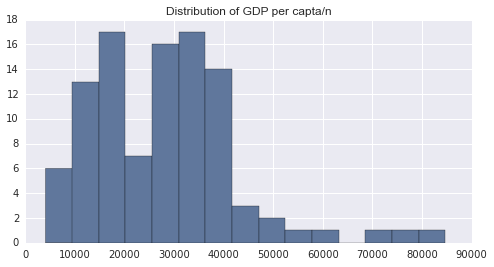

In [49]:
ax = df_gdp["Per capita GDP"].hist(bins = 15);
ax.set_title("Distribution of GDP per capta/n");

###Ok, I'm not sure if it is what I want. I would like to stratify people into social status. Let's see how is distributed the feature _ESCS_, that is about Index of economic, social and cultural status

In [10]:
l_test = ["CNT","ESCS","STIDSTD","PV1MATH","PV2MATH","PV3MATH","PV4MATH","PV5MATH","PV1READ","PV2READ","PV3READ","PV4READ","PV5READ","PV1SCIE","PV2SCIE","PV3SCIE","PV4SCIE","PV5SCIE","W_FSTUWT"]
%time d_data = getData(s_name, l_test)

estou na linha 0
estou na linha 50000
estou na linha 100000
estou na linha 150000
estou na linha 200000
estou na linha 250000
estou na linha 300000
estou na linha 350000
estou na linha 400000
estou na linha 450000
estou na linha 485489
CPU times: user 2min 19s, sys: 1.21 s, total: 2min 20s
Wall time: 2min 21s


In [27]:
df = pd.DataFrame(d_data)

In [28]:
df.ESCS[df.ESCS=="NA"]=None

In [29]:
df.ESCS = df.ESCS.astype(float)

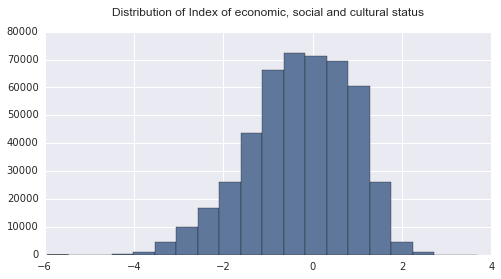

In [33]:
ax = df.ESCS.hist(bins = 20);
ax.set_title("Distribution of Index of economic, social and cultural status\n")

###Curious.... how it is correlated with Math scores? And how the scores are distributed?

In [40]:
df.PV1MATH = df.PV1MATH.astype(float)

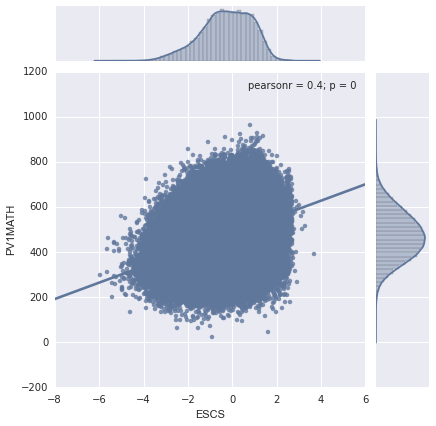

In [41]:
g = sns.jointplot("ESCS", "PV1MATH", data=df, kind="reg",
 size=6)

Curious....the Math Score has a bell-nice-looking shape

###There is too much data here.... I don't know if I can plot all this data using D3. Maybe I should group it in some way....Besides that, This chart is too cluttered....

###Know what....let's see if I just classify each point by its country's GDP per capta. First, I need to identify the GDP for each country

what countries from the dataset does not appear in GDP dataframe

In [76]:
df_gdp = df_gdp.loc[df_gdp["Year"]=="PISA 2012"]

In [77]:
l = [x for x in list(df.CNT) if x not in  list(df_gdp.country)] 

In [78]:
set(l)

{'China-Shanghai',
 'Connecticut (USA)',
 'Florida (USA)',
 'Hong Kong-China',
 'Liechtenstein',
 'Macao-China',
 'Massachusetts (USA)',
 'Norway',
 'Perm(Russian Federation)',
 'United States of America',
 'Vietnam'}

Now, what is in GDP dataset that does not appear in my dataset

In [79]:
l = [x for x in  list(df_gdp.country) if x not in   list(df.CNT)] 
set(l)

{'Cyprus2, 3',
 'Hong Kong - China',
 'Macao - China',
 'Norway1',
 'OECD average',
 'Shanghai - China',
 'United States',
 'Viet Nam'}

Ok...let's map what is missing

In [133]:
def rename_contries(l_names):
    """
    rename the name of each string in a list by names pre-selected
    inside the function. Return a new list with the names modifieds
    """
    set_names = set(l_names)
    b=[x.strip() for x in set_names]
    d_newNames = dict(zip(b,b))
    l2 = ["UAE", "UK", "Serbia", "South Korea", "Taiwan", "Slovakia", "Russia", 
          "Russia", "Hong Kong","China", "Macau", "USA", "USA","USA", "USA",
          "Vietnam", "Macau", "Hong Kong","China", "Norway", "USA","Macau"]
    
    l1 = ["United Arab Emirates","United Kingdom","Serbia","Korea","Chinese Taipei",
          "Slovak Republic","Russian Federation","Perm(Russian Federation)",
          "Hong Kong-China", "China-Shanghai","Macau","Connecticut (USA)","Florida (USA)",
          "Massachusetts (USA)", "United States of America", "Viet Nam", "Macao - China",
         "Hong Kong - China", "Shanghai - China", "Norway1", 'United States', 'Macao-China']
    for s1, s2 in zip(l1,l2):
        if s1 in set_names:
           d_newNames[s1] = s2
    
    l_rtn = [d_newNames[x] for x in l_names] 
    return l_rtn



In [134]:
df.CNT1 = None
df.CNT1 = rename_contries(list(df.CNT))

In [141]:
df_gdp.country1 = None
df_gdp.country1 = rename_contries(list(df_gdp.country))


In [142]:
l = [x for x in  list(df_gdp.country1) if x not in   list(df.CNT1)] 
set(l)

{'Cyprus2, 3', 'OECD average'}

In [143]:
l = [x for x in list(df.CNT1) if x not in  list(df_gdp.country1)] 
set(l)

set()

Nice...all clean

In [152]:
len(df.CNT1)

485490

In [144]:
df_gdp.index=list(df_gdp.country1)

In [158]:
df_gdp = df_gdp.loc[df_gdp.Year=="PISA 2012"]

In [159]:
len(list(df_gdp.ix[df.CNT1]["Per capita GDP"]))


485490

In [151]:
df.shape

(485490, 20)

In [160]:
df["perCaptaGDP"]=None
df["perCaptaGDP"] = list(df_gdp.loc[df.CNT1]["Per capita GDP"].values)

In [ ]:
df["pisa_class"] = None
df.pisa_class = df.perCaptaGDP>20000

In [ ]:
g = sns.FacetGrid(tips, col="sex", hue="pisa_class", palette="Set1")

g = (g.map(plt.scatter, "total_bill", "tip", **kws).add_legend())

ValueError: First argument must be a sequence

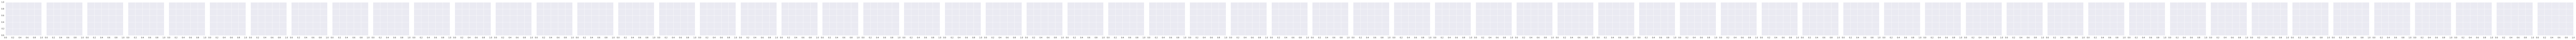

In [171]:
g = sns.FacetGrid(df, col="perCaptaGDP", hue="perCaptaGDP", palette="Set1")

g = (g.map(plt.scatter, "PV1MATH", "ESCS").add_legend())

In [169]:
import matplotlib.pylab as plt

In [34]:
df.head()

,CNT,ESCS,PV1MATH,PV1READ,PV1SCIE,PV2MATH,PV2READ,PV2SCIE,PV3MATH,PV3READ,PV3SCIE,PV4MATH,PV4READ,PV4SCIE,PV5MATH,PV5READ,PV5SCIE,STIDSTD,W_FSTUWT
0,Albania,NaN,406.8469,249.5762,341.7009,376.4683,254.342,408.84,344.5319,406.8496,348.2283,321.1637,175.7053,367.8105,381.9209,218.5981,392.9877,00001,8.9096
1,Albania,NaN,486.1427,406.2936,548.9929,464.3325,349.8975,471.5964,453.4273,400.7334,471.5964,472.9008,369.7553,443.6218,476.0165,396.7618,454.8116,00002,8.9096
2,Albania,NaN,533.2684,401.21,499.6643,481.0796,404.3872,428.7952,489.6479,387.7067,492.2044,490.4269,431.3938,512.7191,533.2684,401.21,499.6643,00003,8.4871
3,Albania,NaN,412.2215,547.363,438.6796,498.6836,481.4353,481.574,415.3373,461.5776,448.937,466.7472,425.0393,474.1141,454.2842,471.9036,426.5573,00004,8.4871
4,Albania,NaN,381.9209,311.7707,361.5628,328.1742,141.7883,275.774,403.7311,293.5015,372.7527,418.5309,272.8495,403.5248,395.1628,260.1405,422.1746,00005,8.4871


###Look at what there are inside the data

In [4]:
%matplotlib inline
from IPython.core.display import HTML


def css_styling():
    styles = open("css/ipython2.css", "r").read()
    return HTML(styles)

css_styling()

In [21]:
import seaborn as sns
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
sns.set_style("darkgrid")